In [1]:
%load_ext autoreload
%load_ext autotime

time: 156 µs (started: 2023-11-19 20:51:29 -08:00)


In [2]:
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings('ignore')

time: 473 µs (started: 2023-11-19 20:51:30 -08:00)


In [3]:
import dask.dataframe as dd
import numpy as np
import pandas as pd


time: 1.02 s (started: 2023-11-19 20:51:31 -08:00)


In [5]:
trace_path = '/p/vast1/iopp/recorder_app_logs/montage_pegasus/nodes-32/_parquet'

time: 469 µs (started: 2023-11-19 20:51:59 -08:00)


In [6]:
%autoreload 2

from wisio.cluster_management import load_cluster_config
from wisio.recorder import RecorderAnalyzer

cluster_config = load_cluster_config('cluster_config_local.yml')
cluster_config.local_dir = '/var/tmp/wisio-recorder-montagep'

analyzer = RecorderAnalyzer(
    checkpoint=False,
    checkpoint_dir=f"{trace_path}/_checkpoints",
    cluster_config=cluster_config,
    working_dir='.recorder/montagep',
    debug=True,
)

analyzer

[INFO] [20:52:18] Initializing Recorder analyzer [/g/g91/izzet/projects/wisio/notebooks/../wisio/analyzer.py:86]
[DEBUG] [20:52:18] Using selector: EpollSelector [/collab/usr/gapps/python/build/spack-toss4.1/var/spack/environments/python/._view/75prb56irmif5ejtirjthpx6kq3gqo52/lib/python3.9/asyncio/selector_events.py:54]


time: 2.42 s (started: 2023-11-19 20:52:18 -08:00)


In [7]:
analyzer.cluster_manager.client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:38787/status,
Dashboard: http://127.0.0.1:38787/status,Workers: 8
Total threads: 48,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42295,Workers: 8
Dashboard: http://127.0.0.1:38787/status,Total threads: 48
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:45287,Total threads: 6
Dashboard: http://127.0.0.1:34511/status,Memory: 0 B
Nanny: tcp://127.0.0.1:36997,


time: 38.8 ms (started: 2023-11-19 20:52:27 -08:00)


In [8]:
%autoreload 2

res = analyzer.analyze_parquet(
    trace_path=trace_path, 
    metrics=['time'],
)

[DEBUG] [20:53:07] Read traces (0.15018035098910332) [/g/g91/izzet/projects/wisio/notebooks/../wisio/utils/logger.py:15]


loading view _hlm 2023-11-19 20:53:07.663979
calling fallback for _hlm 2023-11-19 20:53:07.664434
storing view _hlm (1) 2023-11-19 20:53:12.166292


[DEBUG] [20:53:14] Compute high-level metrics (7.282291232142597) [/g/g91/izzet/projects/wisio/notebooks/../wisio/utils/logger.py:15]


killing _hlm memory
loading stored _hlm 2023-11-19 20:53:14.934259
loading view _main_view 2023-11-19 20:53:14.960134
calling fallback for _main_view 2023-11-19 20:53:14.960722
storing view _main_view (1) 2023-11-19 20:53:15.763702


[DEBUG] [20:53:16] Compute main view (1.848925728816539) [/g/g91/izzet/projects/wisio/notebooks/../wisio/utils/logger.py:15]


killing _main_view memory
loading stored _main_view 2023-11-19 20:53:16.783181


[DEBUG] [20:53:21] Compute views (4.25074906507507) [/g/g91/izzet/projects/wisio/notebooks/../wisio/utils/logger.py:15]
[DEBUG] [20:53:22] Compute logical views (1.8495912617072463) [/g/g91/izzet/projects/wisio/notebooks/../wisio/utils/logger.py:15]


dict_keys(['time'])
dict_keys(['time'])


[DEBUG] [20:53:29] Detect bottlenecks (6.27866268903017) [/g/g91/izzet/projects/wisio/notebooks/../wisio/utils/logger.py:15]


time: 21.7 s (started: 2023-11-19 20:53:07 -08:00)


In [9]:
from wisio.rule_engine import RuleEngine

re = RuleEngine(rules=[])
rf = re.process_characteristics(main_view=res.main_view)
rf

[DEBUG] [20:53:44] deprecate positional args: graphviz.backend.piping.pipe(['renderer', 'formatter', 'neato_no_op', 'quiet']) [/g/g91/izzet/projects/wisio/venv-corona/lib/python3.9/site-packages/graphviz/_tools.py:147]
[DEBUG] [20:53:44] deprecate positional args: graphviz.backend.rendering.render(['renderer', 'formatter', 'neato_no_op', 'quiet']) [/g/g91/izzet/projects/wisio/venv-corona/lib/python3.9/site-packages/graphviz/_tools.py:147]
[DEBUG] [20:53:44] deprecate positional args: graphviz.backend.unflattening.unflatten(['stagger', 'fanout', 'chain', 'encoding']) [/g/g91/izzet/projects/wisio/venv-corona/lib/python3.9/site-packages/graphviz/_tools.py:147]
[DEBUG] [20:53:44] deprecate positional args: graphviz.backend.viewing.view(['quiet']) [/g/g91/izzet/projects/wisio/venv-corona/lib/python3.9/site-packages/graphviz/_tools.py:147]
[DEBUG] [20:53:44] deprecate positional args: graphviz.quoting.quote(['is_html_string', 'is_valid_id', 'dot_keywords', 'endswith_odd_number_of_backslashes

{<Rule.CHAR_IO_TIME: 118>: RuleResult(description='I/O Time', detail_list=['Read - 3.11 seconds (83.17%)', 'Write - 0.62 seconds (16.56%)', 'Metadata - 0.25 seconds (6.70%)'], extra_data=None, reasons=None, value=3.7391976846277544, value_fmt='3.74 seconds'),
 <Rule.CHAR_IO_COUNT: 111>: RuleResult(description='I/O Ops', detail_list=['Read - 6,683,714 ops (54.14%)', 'Write - 5,454,853 ops (44.18%)', 'Metadata - 207,786 ops (1.68%)'], extra_data=None, reasons=None, value=12346353, value_fmt='12,346,353 ops'),
 <Rule.CHAR_IO_SIZE: 116>: RuleResult(description='I/O Size', detail_list=['Read - 114.71 GB (74.85%)', 'Write - 38.55 GB (25.15%)'], extra_data=None, reasons=None, value=164560445659, value_fmt='153.26 GB'),
 <Rule.CHAR_READ_XFER_SIZE: 132>: RuleResult(description='Read Xfer', detail_list=['<4 KB - 27,173 ops (85.73%)', '4-16 KB - 239 ops (0.75%)', '16-64 KB - 4,284 ops (13.52%)'], extra_data=None, reasons=None, value=(2, 57600), value_fmt='4 KB-64 KB - 31,696 ops'),
 <Rule.CHAR_WR

time: 12.2 s (started: 2023-11-19 20:53:43 -08:00)


In [10]:
from rich.console import Console
from rich.panel import Panel
from rich.table import Table
from rich.tree import Tree

# Create a new Table object from Rich library
table = Table(box=None, show_header=False)

# Add columns to the table for the key and value
table.add_column(style="cyan")
table.add_column()

# Add each key-value pair to the table as a row
for rule, result in rf.items():
    if result.detail_list is None:
        table.add_row(result.description, result.value_fmt)
    else:
        detail_tree = Tree(result.value_fmt)
        for detail in result.detail_list:
            detail_tree.add(detail)
        table.add_row(result.description, detail_tree)

# Create a Console object from Rich library
console = Console()

# Print the table with Rich formatting
console.print(Panel(table, title='Summary'))


╭──────────────────────────────────────────────────── Summary ────────────────────────────────────────────────────╮
│  I/O Time        3.74 seconds                                                                                   │
│                  ├── Read - 3.11 seconds (83.17%)                                                               │
│                  ├── Write - 0.62 seconds (16.56%)                                                              │
│                  └── Metadata - 0.25 seconds (6.70%)                                                            │
│  I/O Ops         12,346,353 ops                                                                                 │
│                  ├── Read - 6,683,714 ops (54.14%)                                                              │
│                  ├── Write - 5,454,853 ops (44.18%)                                                             │
│                  └── Metadata - 207,786 ops (1.68%)                                                             │
│  I/O Size        153.26 GB                                                                                      │
│                  ├── Read - 114.71 GB (74.85%)                                                                  │
│                  └── Write - 38.55 GB (25.15%)                                                                  │
│  Read Xfer       4 KB-64 KB - 31,696 ops                                                                        │
│                  ├── <4 KB - 27,173 ops (85.73%)                                                                │
│                  ├── 4-16 KB - 239 ops (0.75%)                                                                  │
│                  └── 16-64 KB - 4,284 ops (13.52%)                                                              │
│  Write Xfer      4 KB-64 MB - 1,759 ops                                                                         │
│                  ├── <4 KB - 726 ops (41.27%)                                                                   │
│                  ├── 4-16 KB - 116 ops (6.59%)                                                                  │
│                  ├── 16-64 KB - 915 ops (52.02%)                                                                │
│                  └── 16-64 MB - 2 ops (0.11%)                                                                   │
│  Node(s)         32 node(s)                                                                                     │
│                  ├── lassen734 - 3.74 s (100.00%) - 6.91/1.25 GB R/W (4.51/0.81%) - 569,078 ops (4.61%)         │
│                  ├── lassen731 - 3.65 s (97.62%) - 6.46/1.27 GB R/W (4.22/0.83%) - 572,777 ops (4.64%)          │
│                  ├── lassen677 - 3.63 s (97.03%) - 8.10/1.94 GB R/W (5.28/1.26%) - 671,924 ops (5.44%)          │
│                  ├── lassen200 - 0.50 s (13.38%) - 5.61/0.49 GB R/W (3.66/0.32%) - 394,314 ops (3.19%)          │
│                  ├── lassen528 - 0.40 s (10.71%) - 3.37/0.91 GB R/W (2.20/0.59%) - 344,224 ops (2.79%)          │
│                  ├── lassen77 - 0.40 s (10.63%) - 3.72/3.88 GB R/W (2.43/2.53%) - 657,508 ops (5.33%)           │
│                  ├── lassen193 - 0.39 s (10.49%) - 4.12/0.58 GB R/W (2.69/0.38%) - 374,193 ops (3.03%)          │
│                  ├── lassen400 - 0.37 s (9.93%) - 4.31/1.84 GB R/W (2.81/1.20%) - 473,919 ops (3.84%)           │
│                  ├── lassen526 - 0.35 s (9.34%) - 4.72/1.09 GB R/W (3.08/0.71%) - 457,692 ops (3.71%)           │
│                  ├── lassen350 - 0.34 s (9.21%) - 3.77/1.16 GB R/W (2.46/0.76%) - 403,582 ops (3.27%)           │
│                  ├── lassen533 - 0.34 s (9.19%) - 1.96/0.64 GB R/W (1.28/0.42%) - 228,594 ops (1.85%)           │
│                  ├── lassen204 - 0.34 s (9.16%) - 2.65/0.17 GB R/W (1.73/0.11%) - 206,624 ops (1.67%)           │
│                  ├── lassen192 - 0.34 s (9.03%) - 2.79

time: 89.5 ms (started: 2023-11-19 20:53:58 -08:00)


In [11]:
for metric in res.bottlenecks:
    for view_key in res.bottlenecks[metric]:
        hl = res.bottlenecks[metric][view_key].high_level_view
        ml = res.bottlenecks[metric][view_key].mid_level_view
        ll = res.bottlenecks[metric][view_key].low_level_view
        print(metric, view_key, 'hl', len(hl), len(hl[hl['time_threshold'] == 0]), len(hl[hl['time_threshold'] > 0.01]), len(hl[hl['time_threshold'] > 0.1]), len(hl[hl['time_threshold'] > 0.5]))
        print(metric, view_key, 'ml', len(ml), len(ml[ml['time_threshold'] == 0]), len(ml[ml['time_threshold'] > 0.01]), len(ml[ml['time_threshold'] > 0.1]), len(ml[ml['time_threshold'] > 0.5]))
        print(metric, view_key, 'll', len(ll), len(ll[ll['time_threshold'] == 0]), len(ll[ll['time_threshold'] > 0.01]), len(ll[ll['time_threshold'] > 0.1]), len(ll[ll['time_threshold'] > 0.5]))

time ('file_name',) hl 17945 8242 220 14 1
time ('file_name',) ml 38746 27001 368 15 1
time ('file_name',) ll 40268 28055 301 14 0
time ('proc_name',) hl 9097 5056 7 1 1
time ('proc_name',) ml 13958 9785 0 0 0
time ('proc_name',) ll 47576 39267 0 0 0
time ('time_range',) hl 50 5 23 20 5
time ('time_range',) ml 10557 1616 765 493 6
time ('time_range',) ll 39574 24624 1292 73 0
time ('file_name', 'proc_name') hl 6571 4936 1 0 0
time ('file_name', 'proc_name') ml 11437 9813 0 0 0
time ('file_name', 'proc_name') ll 27163 24874 0 0 0
time ('file_name', 'time_range') hl 54 1 12 9 0
time ('file_name', 'time_range') ml 4419 1503 94 43 0
time ('file_name', 'time_range') ll 9979 6835 127 8 0
time ('proc_name', 'file_name') hl 10803 1942 133 12 1
time ('proc_name', 'file_name') ml 21390 8823 133 12 1
time ('proc_name', 'file_name') ll 21536 8940 135 12 0
time ('proc_name', 'time_range') hl 35 0 12 9 1
time ('proc_name', 'time_range') ml 4102 847 72 42 1
time ('proc_name', 'time_range') ll 13285 9

In [7]:
time_range_group_view = res.group_views['duration'][('time_range',)].compute()
time_range_group_view

,bw,data_count,duration_sum,index_count,intensity,iops,size_sum,att_perf,total_records,duration_csp,...,duration_sum_sum,index_count_sum,io_per,index_count_per,io_per_rev,index_count_per_rev,angle,io_per_d,index_count_per_d,angle2
time_range,,,,,,,,,,,,,,,,,,,,,
4,3.234296e+09,13544,0.373289,13596,0.013879,401231.183204,238965134,456188.360903,684063,1.000000,...,8.806191,684063,0.957611,0.980125,0.042389,0.019875,45.665675,NaN,NaN,0.000000
1,3.380113e+09,21264,0.296468,21316,1.667634,443098.934478,438514564,795454.536159,684063,1.794205,...,8.806191,684063,0.966334,0.948964,0.076055,0.051036,45.765335,0.033666,0.031161,42.787090
14,3.490621e+09,19178,0.293782,19194,0.910714,435406.177607,304256080,477886.893835,684063,2.581214,...,8.806191,684063,0.966639,0.920905,0.109416,0.079095,45.958939,0.033361,0.028059,40.066215
10,3.533659e+09,19806,0.286649,19822,0.002689,431747.392284,306547552,464494.592726,684063,3.349114,...,8.806191,684063,0.967449,0.891928,0.141967,0.108072,46.109624,0.032551,0.028977,41.675591
6,1.285494e+09,20558,0.282696,20610,0.012838,400807.671512,305077632,467470.465563,684063,4.106424,...,8.806191,684063,0.967898,0.861799,0.174069,0.138201,46.217484,0.032102,0.030129,43.183956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,0.000000e+00,0,0.000017,1,0.000000,0.000000,0,0.000000,684063,23.590658,...,8.806191,684063,0.999998,0.000006,0.999994,0.999994,44.066136,0.000002,0.000001,37.297883
49,0.000000e+00,0,0.000016,1,0.000000,0.000000,0,0.000000,684063,23.590701,...,8.806191,684063,0.999998,0.000004,0.999996,0.999996,46.073007,0.000002,0.000001,38.819640
51,0.000000e+00,0,0.000015,1,0.000000,0.000000,0,0.000000,684063,23.590741,...,8.806191,684063,0.999998,0.000003,0.999997,0.999997,49.358476,0.000002,0.000001,40.448937


time: 10.3 s (started: 2023-09-22 13:04:05 -07:00)


In [11]:
# time_range_group_view['io_per_rev'] = (1 - time_range_group_view['io_per']).cumsum()
# time_range_group_view['index_count_per_rev'] = 1 - time_range_group_view['index_count_per']
time_range_group_view2 = time_range_group_view[['io_per_rev', 'index_count_per_rev', 'angle', 'angle2', 'duration_delta']]
# time_range_group_view2 = time_range_group_view2[time_range_group_view2['angle'] <= 45]
time_range_group_view2

,io_per_rev,index_count_per_rev,angle,angle2,duration_delta
time_range,,,,,
4,0.042389,0.019875,45.665675,0.000000,1.000000
1,0.076055,0.051036,45.765335,42.787090,0.794205
14,0.109416,0.079095,45.958939,40.066215,0.787009
10,0.141967,0.108072,46.109624,41.675591,0.767900
6,0.174069,0.138201,46.217484,43.183956,0.757310
...,...,...,...,...,...
54,0.999994,0.999994,44.066136,37.297883,0.000045
49,0.999996,0.999996,46.073007,38.819640,0.000043
51,0.999997,0.999997,49.358476,40.448937,0.000040


time: 14.7 ms (started: 2023-09-22 13:06:19 -07:00)


In [12]:
time_range_group_view2[time_range_group_view2['angle2']< 50]

,io_per_rev,index_count_per_rev,angle,angle2,duration_delta
time_range,,,,,
4,0.042389,0.019875,45.665675,0.000000,1.000000
1,0.076055,0.051036,45.765335,42.787090,0.794205
14,0.109416,0.079095,45.958939,40.066215,0.787009
10,0.141967,0.108072,46.109624,41.675591,0.767900
6,0.174069,0.138201,46.217484,43.183956,0.757310
...,...,...,...,...,...
362,0.999992,0.999993,42.558590,15.650759,0.000246
54,0.999994,0.999994,44.066136,37.297883,0.000045
49,0.999996,0.999996,46.073007,38.819640,0.000043


time: 12.4 ms (started: 2023-09-22 13:06:23 -07:00)


<Axes: xlabel='io_per_rev'>

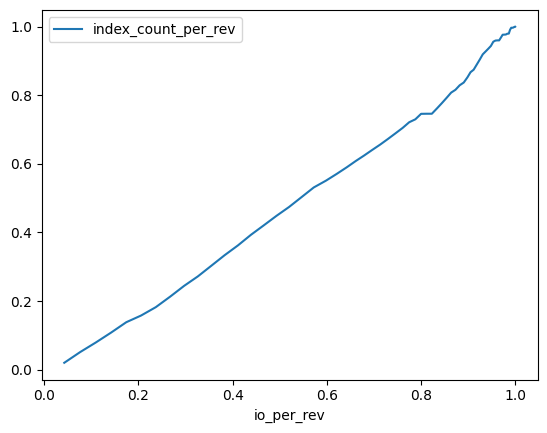

time: 231 ms (started: 2023-09-22 13:06:47 -07:00)


In [13]:
time_range_group_view2.plot(x='io_per_rev', y='index_count_per_rev')

In [ ]:
file_name_group_view = res.group_views['duration'][('file_name',)].compute()
file_name_group_view

In [15]:
file_name_group_view[['io_per_rev', 'index_count_per_rev', 'angle', 'angle2', 'duration_delta']]

,io_per_rev,index_count_per_rev,angle,angle2,duration_delta
file_name,,,,,
/p/gpfs1/haridev/iopp/montage-workflow/scratch/run_dir/3-mosaic.fits,0.005688,0.007418,44.950131,0.000000,1.000000
/p/gpfs1/haridev/iopp/montage-workflow/scratch/run_dir/2-mosaic.fits,0.009883,0.014835,44.856346,60.513127,0.737388
/p/gpfs1/haridev/iopp/montage-workflow/scratch/run_dir/1-mosaic.fits,0.013580,0.022253,44.747027,63.502907,0.650081
/p/gpfs1/haridev/iopp/montage-workflow/scratch/run_dir/3-mosaic_area.fits,0.017116,0.029670,44.631736,64.515338,0.621560
/p/gpfs1/haridev/iopp/montage-workflow/scratch/run_dir/1-mosaic_area.fits,0.020647,0.037088,44.515020,64.543005,0.620788
...,...,...,...,...,...
/p/gpfs1/haridev/iopp/montage-workflow/scratch/run_dir/2-fit.000027.000054.txt,0.999999,0.999998,62.097139,61.987686,0.000048
/p/gpfs1/haridev/iopp/montage-workflow/scratch/run_dir/1-fit.000051.000058.txt,0.999999,0.999999,62.144116,61.987686,0.000048
/p/gpfs1/haridev/iopp/montage-workflow/scratch/run_dir/2-fit.000026.000054.txt,1.000000,0.999999,62.186856,62.087180,0.000048


time: 13.5 ms (started: 2023-09-22 13:08:24 -07:00)


<Axes: xlabel='io_per_rev'>

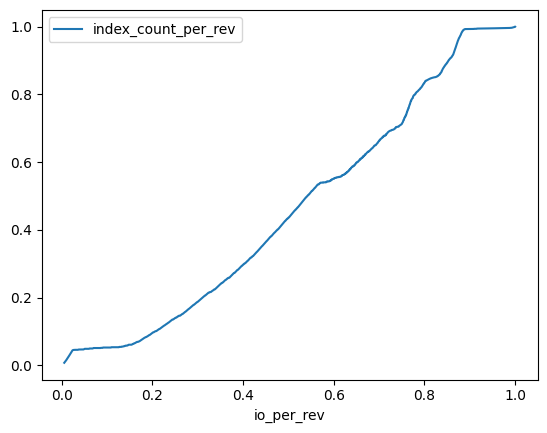

time: 263 ms (started: 2023-09-22 13:08:44 -07:00)


In [16]:
file_name_group_view.plot(x='io_per_rev', y='index_count_per_rev')

In [18]:
file_name_group_view[file_name_group_view['angle2'] < 45][['io_per_rev', 'index_count_per_rev', 'angle', 'angle2', 'duration_delta']]

,io_per_rev,index_count_per_rev,angle,angle2,duration_delta
file_name,,,,,
/p/gpfs1/haridev/iopp/montage-workflow/scratch/run_dir/3-mosaic.fits,0.005688,0.007418,44.950131,0.000000,1.000000
/p/gpfs1/haridev/iopp/montage-workflow/scratch/run_dir/cposs2ukstu_blue_002_003_area.fits,0.026645,0.045465,44.440698,19.964561,0.464218
/p/gpfs1/haridev/iopp/montage-workflow/scratch/run_dir/1-diff.000039.000046_area.fits,0.028661,0.045696,44.493131,6.558283,0.354435
2-fit.000024.000060.txt,0.030557,0.045697,44.549107,0.005187,0.333411
1-fit.000059.000063.txt,0.032331,0.045697,44.601548,0.005547,0.311756
...,...,...,...,...,...
/p/gpfs1/haridev/iopp/montage-workflow/scratch/run_dir/3-fit.000035.000050.txt,0.999927,0.999879,58.939831,25.286458,0.000192
/p/gpfs1/haridev/iopp/montage-workflow/scratch/run_dir/3-fit.000031.000052.txt,0.999928,0.999879,59.211955,25.286459,0.000192
/p/gpfs1/haridev/iopp/montage-workflow/scratch/run_dir/3-fit.000035.000046.txt,0.999929,0.999880,59.486356,25.379855,0.000191


time: 21.3 ms (started: 2023-09-22 13:09:26 -07:00)


In [19]:
proc_name_group_view = res.group_views['duration'][('proc_name',)].compute()
proc_name_group_view

,bw,data_count,duration_sum,index_count,intensity,iops,size_sum,att_perf,total_records,duration_csp,...,duration_sum_sum,index_count_sum,io_per,index_count_per,io_per_rev,index_count_per_rev,angle,io_per_d,index_count_per_d,angle2
proc_name,,,,,,,,,,,,,,,,,,,,,
mAdd#lassen734#63830#35184372410384,1.079806e+09,251470,3.739198,251798,0.000062,67252.395088,4037606516,152622.284735,12346353,1.000000,...,233.646115,12346353,0.983996,9.796055e-01,0.016004,0.020395,44.871880,NaN,NaN,0.000000
mAdd#lassen731#174503#35184372410384,1.103674e+09,251236,3.650154,251564,0.000062,68828.869699,4028580224,147706.259781,12346353,1.976187,...,233.646115,12346353,0.984377,9.592299e-01,0.031626,0.040770,44.728212,0.015623,2.037557e-02,52.521509
mAdd#lassen677#17750#35184372410384,1.102342e+09,250518,3.628076,250846,0.000063,69049.823779,3999379634,222981.256262,12346353,2.946468,...,233.646115,12346353,0.984472,9.389125e-01,0.047154,0.061088,44.578013,0.015528,2.031742e-02,52.610247
mViewer#lassen200#51803#35184391815168,2.546719e+09,21605,0.500215,21615,0.000017,43191.454111,1273906251,61225.210688,12346353,3.080244,...,233.646115,12346353,0.997859,9.371618e-01,0.049295,0.062838,44.588984,0.002141,1.750719e-03,39.274462
mImgtbl#lassen731#174296#35184372410384,4.293348e+05,135,0.431586,2408,0.012995,312.799549,185295,648148.166159,12346353,3.195667,...,233.646115,12346353,0.998153,9.369667e-01,0.051142,0.063033,44.638733,0.001847,1.950374e-04,6.027333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mDiffFit#lassen352#86094#35184372410352,0.000000e+00,0,0.000327,6,0.000000,0.000000,0,0.000000,12346353,62.485287,...,233.646115,12346353,0.999999,1.943894e-06,0.999995,0.999998,19.607025,0.000001,4.859735e-07,19.143357
mDiffFit#lassen352#83657#35184372410352,0.000000e+00,0,0.000327,6,0.000000,0.000000,0,0.000000,12346353,62.485374,...,233.646115,12346353,0.999999,1.457920e-06,0.999996,0.999999,19.758720,0.000001,4.859735e-07,19.165087
mDiffFit#lassen734#56090#35184372410352,0.000000e+00,0,0.000324,6,0.000000,0.000000,0,0.000000,12346353,62.485461,...,233.646115,12346353,0.999999,9.719469e-07,0.999997,0.999999,19.994957,0.000001,4.859735e-07,19.301982


time: 200 ms (started: 2023-09-22 13:10:12 -07:00)


In [20]:
proc_name_group_view[proc_name_group_view['angle2'] < 45][['io_per_rev', 'index_count_per_rev', 'angle', 'angle2', 'duration_delta']]

,io_per_rev,index_count_per_rev,angle,angle2,duration_delta
proc_name,,,,,
mAdd#lassen734#63830#35184372410384,0.016004,0.020395,44.871880,0.000000,1.000000
mViewer#lassen200#51803#35184391815168,0.049295,0.062838,44.588984,39.274462,0.133776
mImgtbl#lassen731#174296#35184372410384,0.051142,0.063033,44.638733,6.027333,0.115422
mImgtbl#lassen734#63750#35184372410384,0.052938,0.063228,44.687024,6.199761,0.112188
mDiff#lassen528#18015#35184372410384,0.054652,0.064288,44.706479,31.736417,0.107098
...,...,...,...,...,...
mDiffFit#lassen352#86094#35184372410352,0.999995,0.999998,19.607025,19.143357,0.000087
mDiffFit#lassen352#83657#35184372410352,0.999996,0.999999,19.758720,19.165087,0.000087
mDiffFit#lassen734#56090#35184372410352,0.999997,0.999999,19.994957,19.301982,0.000087


time: 17 ms (started: 2023-09-22 13:10:29 -07:00)


<Axes: xlabel='io_per_rev', ylabel='index_count_per_rev'>

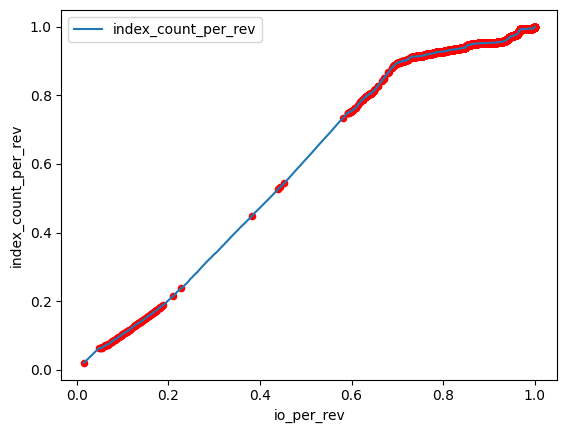

time: 396 ms (started: 2023-09-22 13:16:56 -07:00)


In [32]:
ax = proc_name_group_view.plot(x='io_per_rev', y='index_count_per_rev')
proc_name_group_view[proc_name_group_view['angle2'] < 45].plot.scatter(ax=ax, x='io_per_rev', y='index_count_per_rev', c='red')

In [8]:
res.bottlenecks['duration'][('proc_name',)]['mid_level_view']['duration_th'].value_counts().compute()

0.000    11128
0.001     4425
0.010     1335
Name: duration_th, dtype: int64

time: 1min 15s (started: 2023-09-20 19:53:02 -07:00)


In [ ]:
res.bottlenecks['bw'][('proc_name',)]['mid_level_view']['bw_th'].value_counts().compute()

In [ ]:
res.bottlenecks['iops'][('proc_name',)]['mid_level_view']['iops_th'].value_counts().compute()

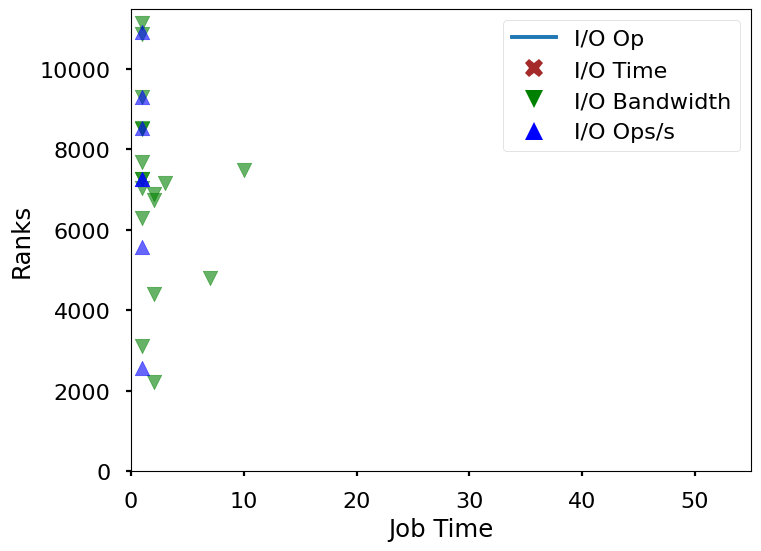

time: 5.4 s (started: 2023-08-01 13:16:12 -07:00)


In [13]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
# plt.figure(figsize=(8, 4))

fig = res.plot.bottleneck_bar(
    figsize=(8, 6),
    metrics=['duration', 'bw', 'iops'],
    labels=['I/O Time', 'I/O Bandwidth', 'I/O Ops/s'],
    thresholds=[0.5, 0.9, 0.9],
    markers=['X', 'v', '^'],
    colors=['brown', 'green', 'blue'],
    marker_size=108,
)

In [12]:
fig.savefig('montage_pegasus.pdf', bbox_inches='tight')

time: 505 ms (started: 2023-08-01 12:57:12 -07:00)


(<Figure size 500x500 with 1 Axes>, <Axes: >)

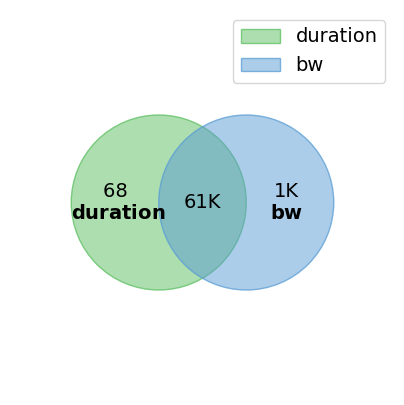

time: 1min 26s (started: 2023-07-30 09:20:16 -07:00)


In [7]:
res.plot.metric_relations2(('time_range',), 'duration', 'bw')

(<Figure size 500x500 with 1 Axes>, <Axes: >)

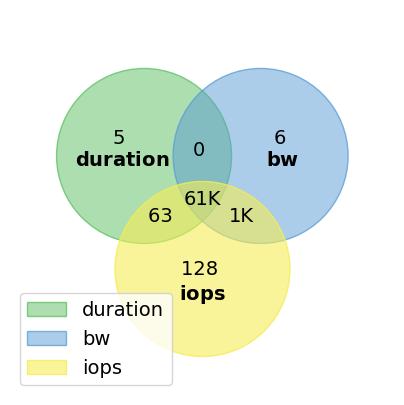

time: 1.22 s (started: 2023-07-30 09:21:44 -07:00)


In [8]:
res.plot.metric_relations3(('time_range',), 'duration', 'bw', 'iops')

(<Figure size 500x500 with 1 Axes>, <Axes: >)

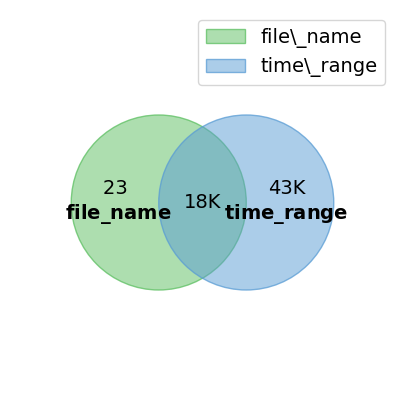

time: 709 ms (started: 2023-07-30 09:21:45 -07:00)


In [9]:
res.plot.view_relations2('duration', ('file_name',), ('time_range',))

(<Figure size 500x500 with 1 Axes>, <Axes: >)

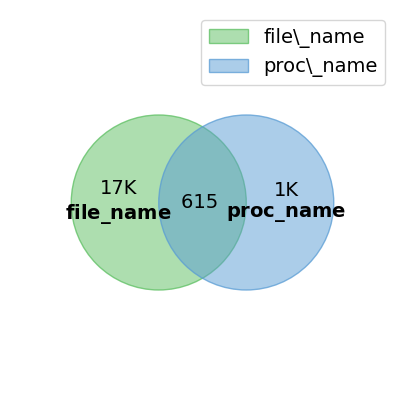

time: 670 ms (started: 2023-07-30 09:21:46 -07:00)


In [10]:
res.plot.view_relations2('duration', ('file_name',), ('proc_name',))

(<Figure size 500x500 with 1 Axes>, <Axes: >)

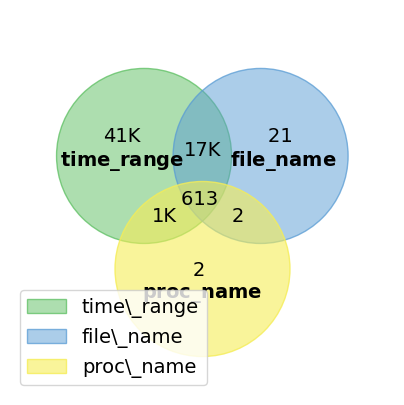

time: 963 ms (started: 2023-07-30 09:21:47 -07:00)


In [11]:
res.plot.view_relations3('duration', ('time_range',), ('file_name',), ('proc_name',))

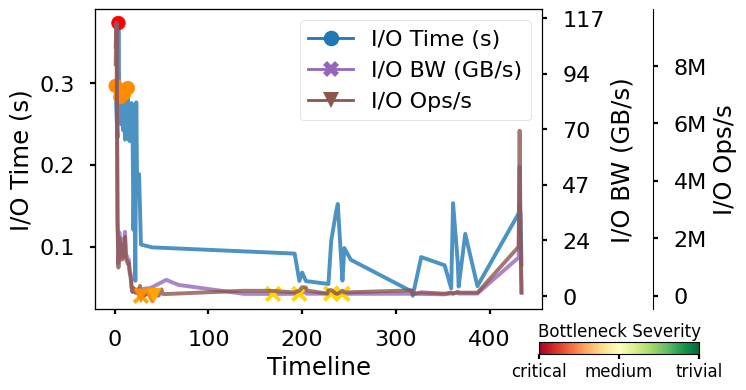

time: 2.81 s (started: 2023-07-30 09:21:48 -07:00)


In [12]:
fig = res.plot.bottleneck_timeline3(
    metric1='duration', 
    metric2='bw', 
    metric3='iops', 
    label1='I/O Time (s)',
    label2='I/O BW (GB/s)',
    label3='I/O Ops/s',
    figsize=(8, 4),
    threshold=0.1,
    sample_count=5,    
)

In [13]:
fig.savefig('montage.pdf', bbox_inches='tight')

time: 720 ms (started: 2023-07-30 09:22:40 -07:00)


<Axes: title={'center': 'bw'}, xlabel='time_range', ylabel='bw'>

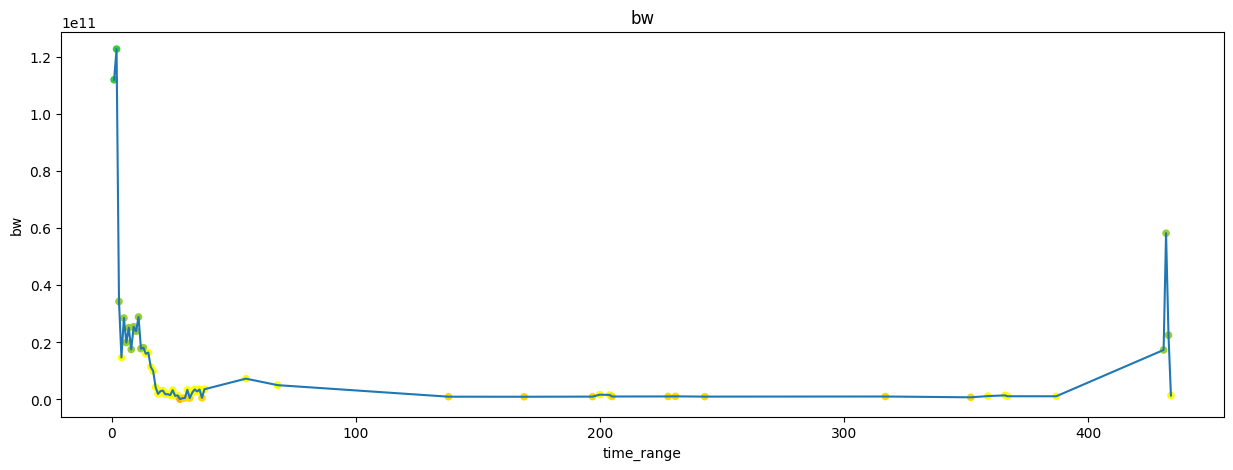

time: 1.03 s (started: 2023-07-29 08:34:28 -07:00)


In [26]:
res.plot.timeline('bw')

<Axes: title={'center': 'iops'}, xlabel='time_range', ylabel='iops'>

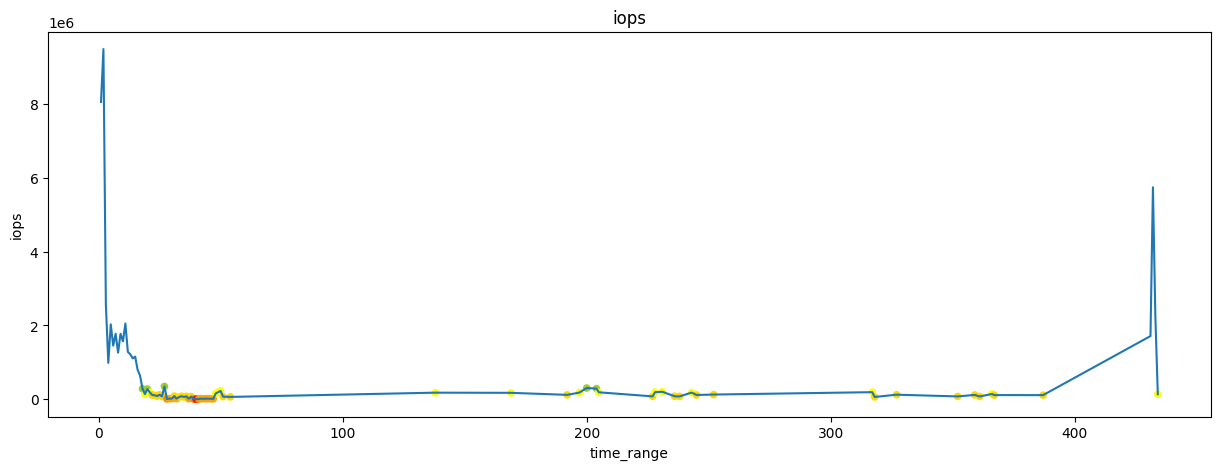

time: 1.08 s (started: 2023-07-29 08:34:35 -07:00)


In [27]:
res.plot.timeline('iops')

In [6]:
from wisio.rules import Rule
from wisio._recorder.rules import RecorderRuleEngine

time: 11 ms (started: 2023-07-05 10:33:55 -07:00)


In [10]:
%%timeit -r 20 -n 1

res = recorder_analyzer.analyze_parquet(log_dir=log_dir, cutoff=0.1, checkpoint=False, persist=True, desired_view_names=['trange'])

main_view, views, bottlenecks = res

rules = dict(
    app_name=[Rule.BOTT_METADATA_ACCESS],
    file_dir=[Rule.BOTT_METADATA_ACCESS],
    file_name=[Rule.BOTT_METADATA_ACCESS],
    file_regex=[Rule.BOTT_METADATA_ACCESS],
    node_name=[Rule.BOTT_METADATA_ACCESS],
    proc_name=[Rule.BOTT_METADATA_ACCESS],
    rank=[Rule.BOTT_METADATA_ACCESS],
    trange=[Rule.BOTT_METADATA_ACCESS],
)

rule_engine = RecorderRuleEngine(rules=rules)

characteristics = rule_engine.process_characteristics(view=main_view)

processed_bottlenecks = rule_engine.process_bottlenecks(bottlenecks=bottlenecks, characteristics=characteristics, threshold=0.1)


14.5 s ± 835 ms per loop (mean ± std. dev. of 20 runs, 1 loop each)
time: 4min 49s (started: 2023-07-05 10:52:44 -07:00)


In [11]:
%%timeit -r 20 -n 1

res = recorder_analyzer.analyze_parquet(log_dir=log_dir, cutoff=0.1, checkpoint=False, persist=False, desired_view_names=['trange'])

main_view, views, bottlenecks = res

rules = dict(
    app_name=[Rule.BOTT_METADATA_ACCESS],
    file_dir=[Rule.BOTT_METADATA_ACCESS],
    file_name=[Rule.BOTT_METADATA_ACCESS],
    file_regex=[Rule.BOTT_METADATA_ACCESS],
    node_name=[Rule.BOTT_METADATA_ACCESS],
    proc_name=[Rule.BOTT_METADATA_ACCESS],
    rank=[Rule.BOTT_METADATA_ACCESS],
    trange=[Rule.BOTT_METADATA_ACCESS],
)

rule_engine = RecorderRuleEngine(rules=rules)

characteristics = rule_engine.process_characteristics(view=main_view)

processed_bottlenecks = rule_engine.process_bottlenecks(bottlenecks=bottlenecks, characteristics=characteristics, threshold=0.1)


ValueError: Metadata inference failed in `set_tranges`.

You have supplied a custom function and Dask is unable to 
determine the type of output that that function returns. 

To resolve this please provide a meta= keyword.
The docstring of the Dask function you ran should have more information.

Original error is below:
------------------------
CancelledError()

Traceback:
---------
  File "/usr/WS2/iopp/projects/vani-analysis-tool/virenv-lassen/lib/python3.7/site-packages/dask/dataframe/utils.py", line 177, in raise_on_meta_error
    yield
  File "/usr/WS2/iopp/projects/vani-analysis-tool/virenv-lassen/lib/python3.7/site-packages/dask/dataframe/core.py", line 6001, in _emulate
    return func(*_extract_meta(args, True), **_extract_meta(kwargs, True))
  File "../wisio/_recorder/analysis.py", line 243, in set_tranges
    tranges = tranges.result() if isinstance(tranges, Future) else tranges
  File "/usr/WS2/iopp/projects/vani-analysis-tool/virenv-lassen/lib/python3.7/site-packages/distributed/client.py", line 272, in result
    result = self.client.sync(self._result, callback_timeout=timeout, raiseit=False)
  File "/usr/WS2/iopp/projects/vani-analysis-tool/virenv-lassen/lib/python3.7/site-packages/distributed/utils.py", line 310, in sync
    self.loop, func, *args, callback_timeout=callback_timeout, **kwargs
  File "/usr/WS2/iopp/projects/vani-analysis-tool/virenv-lassen/lib/python3.7/site-packages/distributed/utils.py", line 376, in sync
    raise exc.with_traceback(tb)
  File "/usr/WS2/iopp/projects/vani-analysis-tool/virenv-lassen/lib/python3.7/site-packages/distributed/utils.py", line 349, in f
    result = yield future
  File "/usr/WS2/iopp/projects/vani-analysis-tool/virenv-lassen/lib/python3.7/site-packages/tornado/gen.py", line 769, in run
    value = future.result()


time: 8min 2s (started: 2023-07-05 10:57:35 -07:00)


In [ ]:
%%timeit -r 10 -n 1

res = recorder_analyzer.analyze_parquet(log_dir=log_dir, checkpoint=False, cutoff=0.1, desired_view_names=['trange'])

main_view, views, bottlenecks = res

rules = dict(
    app_name=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    file_dir=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    file_name=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    file_regex=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    node_name=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    proc_name=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    rank=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    trange=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
)

rule_engine = RecorderRuleEngine(rules=rules)

characteristics = rule_engine.process_characteristics(view=main_view)

processed_bottlenecks = rule_engine.process_bottlenecks(bottlenecks=bottlenecks, characteristics=characteristics, threshold=0.1)


In [7]:
main_view, views, bottlenecks = res

time: 825 µs (started: 2023-03-29 22:40:23 -07:00)


In [8]:
%autoreload 2

from wisio.rules import Rule
from wisio._recorder.rules import RecorderRuleEngine

rules = dict(
    file_name=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    proc_name=[Rule.BOTT_METADATA_ACCESS],
    trange=[],
)

rule_engine = RecorderRuleEngine(rules=rules)


time: 39.6 ms (started: 2023-03-29 22:40:30 -07:00)


In [9]:
%autoreload 2

characteristics = rule_engine.process_characteristics(view=main_view)
characteristics


{<Rule.CHAR_IO_TIME: 118>: RuleResult(data_dict=None, description='I/O Time', detail_list=None, reasons=None, rule=<Rule.CHAR_IO_TIME: 118>, value=8.474973793299455, value_fmt='8.47 seconds'),
 <Rule.CHAR_IO_SIZE: 116>: RuleResult(data_dict=None, description='Total Size', detail_list=None, reasons=None, rule=<Rule.CHAR_IO_SIZE: 116>, value=61944504790, value_fmt='57.69 GB'),
 <Rule.CHAR_READ_IO_SIZE: 125>: RuleResult(data_dict=None, description='Read Size', detail_list=None, reasons=None, rule=<Rule.CHAR_READ_IO_SIZE: 125>, value=34335376652, value_fmt='31.98 GB (55.43%)'),
 <Rule.CHAR_WRITE_IO_SIZE: 130>: RuleResult(data_dict=None, description='Write Size', detail_list=None, reasons=None, rule=<Rule.CHAR_WRITE_IO_SIZE: 130>, value=27608092484, value_fmt='25.71 GB (44.57%)'),
 <Rule.CHAR_READ_XFER_SIZE: 132>: RuleResult(data_dict=None, description='Read Xfer', detail_list=['<4 KB - 3,151 ops (73.88%)', '4-16 KB - 66 ops (1.55%)', '16-64 KB - 1,017 ops (23.85%)', '64-256 KB - 31 ops (0.

time: 391 ms (started: 2023-03-29 22:40:31 -07:00)


In [10]:
from rich.console import Console
from rich.panel import Panel
from rich.table import Table
from rich.tree import Tree

# Create a new Table object from Rich library
table = Table(box=None, show_header=False)

# Add columns to the table for the key and value
table.add_column(style="cyan")
table.add_column()

# Add each key-value pair to the table as a row
for rule, result in characteristics.items():
    if result.detail_list is None:
        table.add_row(result.description, result.value_fmt)
    else:
        detail_tree = Tree(result.value_fmt)
        for detail in result.detail_list:
            detail_tree.add(detail)
        table.add_row(result.description, detail_tree)

# Create a Console object from Rich library
console = Console()

# Print the table with Rich formatting
console.print(Panel(table, title='Summary'))


╭──────────────────────────────────────────────────── Summary ────────────────────────────────────────────────────╮
│  I/O Time          8.47 seconds                                                                                 │
│  Total Size        57.69 GB                                                                                     │
│  Read Size         31.98 GB (55.43%)                                                                            │
│  Write Size        25.71 GB (44.57%)                                                                            │
│  Read Xfer         4 KB-256 KB - 4,265 ops                                                                      │
│                    ├── <4 KB - 3,151 ops (73.88%)                                                               │
│                    ├── 4-16 KB - 66 ops (1.55%)                                                                 │
│                    ├── 16-64 KB - 1,017 ops (23.85%)                                                            │
│                    └── 64-256 KB - 31 ops (0.73%)                                                               │
│  Write Xfer        4 KB-16 MB - 1,215 ops                                                                       │
│                    ├── <4 KB - 1,088 ops (89.55%)                                                               │
│                    ├── 4-16 KB - 64 ops (5.27%)                                                                 │
│                    ├── 16-64 KB - 22 ops (1.81%)                                                                │
│                    ├── 64-256 KB - 10 ops (0.82%)                                                               │
│                    ├── 1-4 MB - 18 ops (1.48%)                                                                  │
│                    └── 4-16 MB - 13 ops (1.07%)                                                                 │
│  Total I/O Ops     6,985,234 ops                                                                                │
│  Read I/O Ops      4,386,801 ops (62.80%)                                                                       │
│  Write I/O Ops     2,515,850 ops (36.02%)                                                                       │
│  Metadata I/O Ops  82,583 ops (1.18%)                                                                           │
│  Apps              5 apps                                                                                       │
│                    ├── mAddMPI - 8.47 s (100.00%) - 3.03/21.47 GB R/W (5.25/37.21%) - 2,133,274 ops (30.54%)    │
│                    ├── mViewer - 3.59 s (42.31%) - 26.25/0.12 GB R/W (45.51/0.20%) - 3,156,825 ops (45.19%)     │
│                    ├── mProjExec - 0.29 s (3.48%) - 2.09/4.13 GB R/W (3.62/7.15%) - 1,636,067 ops (23.42%)      │
│                    ├── mImgtbl - 0.04 s (0.43%) - 0.61/0.00 GB R/W (1.05/0.00%) - 58,312 ops (0.83%)            │
│                    └── mMakeHdr - 0.00 s (0.06%) - 0.00/0.00 GB R/W (0.00/0.00%) - 756 ops (0.01%)              │
│  Nodes             32 nodes                                                                                     │
│                    ├── lassen578 - 8.47 s (100.00%) - 0.53/1.52 GB R/W (0.93/2.64%) - 298,908 ops (4.28%)       │
│                    ├── lassen246 - 8.39 s (99.05%) - 0.38/8.11 GB R/W (0.66/14.05%) - 320,050 ops (4.58%)       │
│                    ├── lassen576 - 4.99 s (58.85%) - 0.48/4.95 GB R/W (0.83/8.59%) - 227,236 ops (3.25%)        │
│                    ├── lassen528 - 3.59 s (42.31%) - 2.74/0.46 GB R/W (4.75/0.80%) - 291,560 ops (4.17%)        │
│                    ├── lassen503 - 3.32 s (39.17%) - 0.47/0.59 GB R/W (0.81/1.02%) - 228,451 ops (3.27%)        │
│                    ├── lassen355 - 2.81 s (33.12%) - 8.99/0.40 GB R/W (15.58/0.70%) - 197,353 ops (2.83%)       │
│                    ├── lassen364 - 2.33 s (27.50%) - 0

time: 180 ms (started: 2023-03-29 22:40:32 -07:00)


In [14]:
%autoreload 2

processed_bottlenecks = rule_engine.process_bottlenecks(bottlenecks=bottlenecks, characteristics=characteristics, threshold=0.1)
processed_bottlenecks

{('file_name',): {<Rule.BOTT_METADATA_ACCESS: 207>: {},
  <Rule.BOTT_SMALL_READS: 211>: {'/p/gpfs1/iopp/temp/montage/2854964/0/run/ngc3372.fits': RuleResult(data_dict={'duration_sum': 0.9441815895092986, 'index_count': 61931, 'size_min': 0, 'size_max': 49032, 'size_sum': 2675395157, 'read_time': 0.9438897895101945, 'write_time': 0.8715055981159026, 'metadata_time': 0.03352300017149901, 'read_size': 2100691156, 'write_size': 574704001, 'metadata_size': 0, 'read_count': 48551, 'write_count': 13299, 'metadata_count': 81, 'read_min': 435602, 'read_max': 478872, 'write_min': 5761, 'write_max': 89424, 'metadata_min': 0, 'metadata_max': 0, 'data_count': 61850, 'data_size': 2675395157, 'data_time': 0.9438897895101945, 'sequential_time': 0.9438897895101945, 'random_time': 0.0, 'sequential_size': 2675395157, 'random_size': 0, 'sequential_count': 61850, 'random_count': 0, 'close_time': 0.0033388000015293073, 'open_time': 0.0301182001712732, 'seek_time': 0.0, 'stat_time': 0.0, 'close_count': 39, '

time: 3.67 s (started: 2023-03-29 22:19:08 -07:00)


In [33]:
processed_bottlenecks[('file_name',)][Rule.BOTT_SMALL_WRITES]

{'/p/gpfs1/iopp/temp/montage/2854964/0/run/ngc3372.fits': RuleResult(data_dict={'duration_sum': 0.9441815895092986, 'index_count': 61931, 'size_min': 0, 'size_max': 49032, 'size_sum': 2675395157, 'read_time': 0.9438897895101945, 'write_time': 0.8715055981159026, 'metadata_time': 0.03352300017149901, 'read_size': 2100691156, 'write_size': 574704001, 'metadata_size': 0, 'read_count': 48551, 'write_count': 13299, 'metadata_count': 81, 'read_min': 435602, 'read_max': 478872, 'write_min': 5761, 'write_max': 89424, 'metadata_min': 0, 'metadata_max': 0, 'data_count': 61850, 'data_size': 2675395157, 'data_time': 0.9438897895101945, 'sequential_time': 0.9438897895101945, 'random_time': 0.0, 'sequential_size': 2675395157, 'random_size': 0, 'sequential_count': 61850, 'random_count': 0, 'close_time': 0.0033388000015293073, 'open_time': 0.0301182001712732, 'seek_time': 0.0, 'stat_time': 0.0, 'close_count': 39, 'open_count': 40, 'seek_count': 0, 'stat_count': 0, 'duration_pero': 0.11140820166969653,

time: 8.99 ms (started: 2023-03-29 18:39:25 -07:00)


In [8]:
!rm -rf {log_dir}/bottlenecks

time: 343 ms (started: 2023-03-12 17:52:39 -07:00)


In [9]:
recorder_analyzer.save_bottlenecks(log_dir=log_dir, bottlenecks=bottlenecks)


time: 7.35 s (started: 2023-03-12 17:52:39 -07:00)


In [10]:
!chmod g+r {log_dir}/bottlenecks/*
!ls -lh {log_dir}/bottlenecks

total 27M
-rw-r--r-- 1 izzet iopp 2.5M Mar 12 17:52 file_name.json
-rw-r--r-- 1 izzet iopp 1.5M Mar 12 17:52 file_name_proc_name.json
-rw-r--r-- 1 izzet iopp 1.4M Mar 12 17:52 file_name_proc_name_trange.json
-rw-r--r-- 1 izzet iopp 1.4M Mar 12 17:52 file_name_trange.json
-rw-r--r-- 1 izzet iopp 1.5M Mar 12 17:52 file_name_trange_proc_name.json
-rw-r--r-- 1 izzet iopp 1.5M Mar 12 17:52 proc_name.json
-rw-r--r-- 1 izzet iopp 2.5M Mar 12 17:52 proc_name_file_name.json
-rw-r--r-- 1 izzet iopp 1.4M Mar 12 17:52 proc_name_file_name_trange.json
-rw-r--r-- 1 izzet iopp 1.4M Mar 12 17:52 proc_name_trange.json
-rw-r--r-- 1 izzet iopp 2.5M Mar 12 17:52 proc_name_trange_file_name.json
-rw-r--r-- 1 izzet iopp 1.4M Mar 12 17:52 trange.json
-rw-r--r-- 1 izzet iopp 2.5M Mar 12 17:52 trange_file_name.json
-rw-r--r-- 1 izzet iopp 1.5M Mar 12 17:52 trange_file_name_proc_name.json
-rw-r--r-- 1 izzet iopp 1.5M Mar 12 17:52 trange_proc_name.json
-rw-r--r-- 1 izzet iopp 2.5M Mar 12 17:52 trange_proc_name_fil